# Stitching Historical Aerial Photos

*Author: Luna Huang, UC Berkeley; email: yue_huang@berkeley.edu*

This Jupyter Notebook illustrates our stitching algorithm with a small subset of test images.

In [1]:
import yaml
import pandas as pd
from IPython.display import Image

from main import run

# parse config file
with open('config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

Let's view our test images.

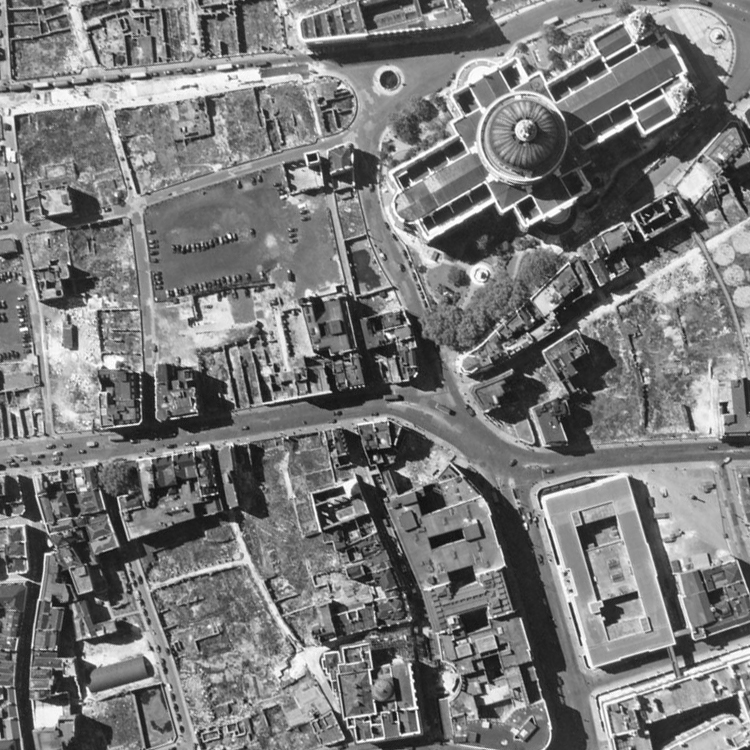

In [2]:
Image('data/images/test0.jpg')  # change this to test1, test2, test3 if you want to view other images

Let's position these images arbitrarily, and see if the stitching algorithm could stitch them together automatically. In practice, we utilize information from sortie plots, which provides higher quality initialization for the stitching algorithm.

**How do you want to position these images initially? Input 4 pairs of initial positions (x, y) which are the centroids of the images. x and y should both be a number between 0 and 1500.**

In [3]:
centroids = {
    # input the initial centroids for the images ['test0', 'test1', 'test2', 'test3']
    'x': [400, 1200, 400, 1200],
    'y': [400, 400, 1200, 1200],
}

**Increase the number of iterations if necessary.** In practice, we also adjust learning rates to accelerate the optimization processes.

In [4]:
cfg['optim_n_iter'] = 10000

**Specify what iterations you want to visualize. Be sure to include the last iteration (the number in the cell above - 1).**

In [5]:
cfg['output_iter'] = [0, 100, 200, 300, 500, 1000, 2000, 4000, 6000, 8000, 9000, 9500, 9999]

Okay! Now run the cell below to run the main codes.

In [6]:
%%capture
# comment out the line above to show logs
# save the initialization
init = pd.DataFrame({
    'file_id': ['test0', 'test1', 'test2', 'test3'],
    'swath_id': range(4),
    'index': range(4),
    'x_init': centroids['x'],
    'y_init': centroids['y'],
    'theta_init': [0] * 4,
    'scale_init': [1] * 4,
})
init.to_csv('data/init.csv', index=False)

# run through all the steps
v = run(cfg)

The output is shown below.

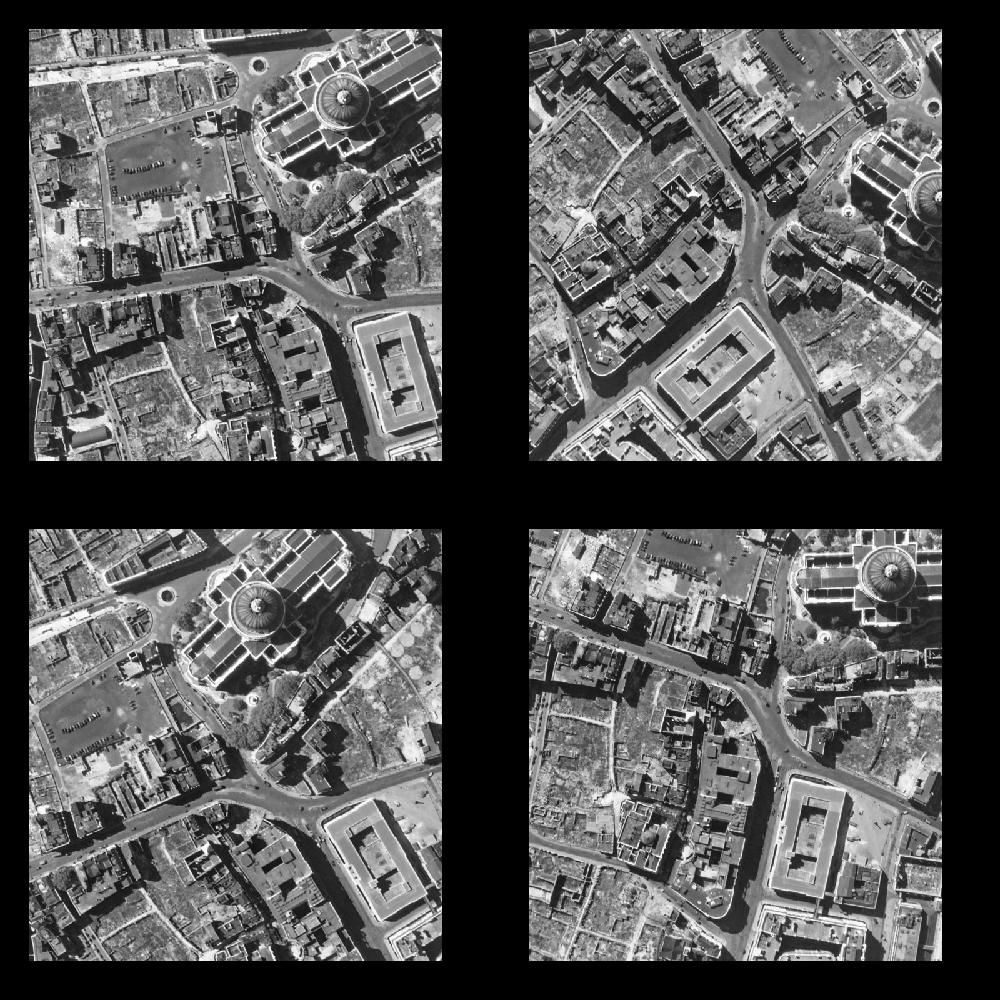

In [7]:
Image('output/demo.gif')

In practice, we run this algorithm on much higher resolution inputs, and with a larger number of images being jointly optimized to construct ortho-mosaics of large geographical areas. The code base is still being developed and cleaned up, and we plan to open source all of our codes for future users interested in stitching historical aerial photos or other sorts of remote sensing inputs (e.g., UAV images).